In [20]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import constants as c
from astropy import units as u
import sys, os, glob
from astropy.io import fits
from matplotlib.patches import Ellipse

In [30]:
import treecorr

In [21]:
RA_range = (-4, 4)
Dec_range = (-4, 4)
num_den = 10
num_gal = int(np.abs(num_den * (Dec_range[1] - Dec_range[0]) * (RA_range[1] - RA_range[0])))
print(num_gal)

RAs = np.random.uniform(RA_range[0], RA_range[1], size=num_gal)
Decs = np.random.uniform(Dec_range[0], Dec_range[1], size=num_gal)

640


In [22]:
def Q(x, y):
    return 4 * (d(x, y) + 4/3 * s(x, y)) * a(x, y) + 1/3 * c(x, y)**2
def S(x, y):
    return 2 * (d(x, y) + 4/3 * s(x, y)) ** 2 \
            + 2 * np.abs(a(x, y))**2 + 2/3 * np.abs(c(x, y))**2 + 4/9 * np.abs(s(x, y))**2
def gamma(x, y):
    return Q(x, y) / S(x, y)

def getLineParameters(xpos, ypos, gamma):
    length, angle = np.abs(gamma), np.angle(gamma)
    return [xpos - np.cos(angle)*length/2, xpos + np.cos(angle)*length/2], \
            [ypos - np.sin(angle)*length/2, ypos + np.sin(angle)*length/2]

In [23]:
d = np.vectorize(lambda x, y: 1e-1)
a_real, a_imag = np.vectorize(lambda x, y: 1e-2), np.vectorize(lambda x, y: np.sqrt(x**2+y**2) * 3e-3)
a = np.vectorize(lambda x, y: a_real(x, y) + a_imag(x, y) * 1j)
c_real, c_imag = np.vectorize(lambda x, y: 1e-2), np.vectorize(lambda x, y: np.sqrt(x**2+y**2) * 3e-3)
c = np.vectorize(lambda x, y: c_real(x, y) + c_imag(x, y) * 1j)
s = np.vectorize(lambda x, y: 1e-2)

In [27]:
gammas = gamma(RAs, Decs)
e_s = np.abs(gammas*2)
phi_s = np.angle(gammas*2)
a_ep_s = np.sqrt(S(RAs, Decs))
b_ep_s = a_ep_s * np.sqrt(1 - e_s**2)
print(a_ep_s.shape, b_ep_s.shape, e_s.shape, phi_s.shape, np.degrees(phi_s).shape)

(640,) (640,) (640,) (640,) (640,)


(640, 6)


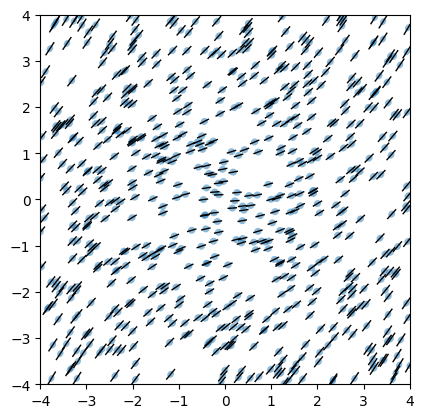

In [28]:
rand_coords = np.vstack((RAs, Decs, a_ep_s, b_ep_s, phi_s, gammas)).T
print(rand_coords.shape)

fig, ax = plt.subplots()
# Loop over the RA and Dec values
for ra, de, a_ep, b_ep, phi, gam in rand_coords:
    ra, de, a_ep, b_ep, phi = np.real([ra, de, a_ep, b_ep, phi])
    # Create an ellipse patch with a given size centered at the RA, Dec position
    plt.plot(*getLineParameters(ra, de, gam), color="black", lw=1)
    ellipse = Ellipse(xy=(ra, de), width=a_ep, height=b_ep, angle=np.degrees(phi), alpha=0.5)
    # Add the ellipse patch to the axes
    ax.add_patch(ellipse)

# Show the plot
ax.set_aspect('equal')
plt.xlim(RA_range)
plt.ylim(Dec_range)
plt.show()

In [29]:
print(RAs.shape, Decs.shape, gammas.shape)
print(RAs[0], Decs[0], gammas[0])

(640,) (640,) (640,)
1.8980676970028645 0.18474342406370248 (0.17463513910715903+0.10088100863639969j)


# TreeCorr